<a href="https://colab.research.google.com/github/abdulehsan/Assignments/blob/main/Stats_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
%reset -f

**About Dataset**

**Purpose:** The dataset is designed to explore the potential relationship between lifestyle habits and the probability of developing cancer.

**Variables:**


*   Sr No.: A unique identifier for each observation.
*   Smoking Habit: Categorizes individuals based on their smoking frequency (e.g., Heavy, Moderate, Occasional, None).

*   Drinking Habit: Categorizes individuals based on their alcohol consumption frequency (e.g., Frequent, Occasional, None).
*   Biking Habit: Measures the frequency of biking activity (e.g., High, Medium, Low).
*   Walking Habit: Measures the frequency of walking activity (e.g., High, Medium, Low).
*   Jogging Habit: Measures the frequency of jogging activity (e.g., High, Medium, Low).
*   Probability of Cancer: A numerical value representing the estimated likelihood of developing cancer, ranging from 0 to 1.

**Assumptions:**

The dataset assumes a causal relationship between lifestyle habits and cancer risk. However, correlation does not necessarily imply causation, and other factors may influence cancer development.
The probability of cancer is a simplified representation and may vary based on individual factors, genetics, and environmental influences.

In [6]:
pd.set_option('display.width', 0)
pd.set_option('display.max_colwidth', None)
print(data.to_string(index=False))

 Sr No. Smoking Habit Drinking Habit Biking Habit Walking Habit Jogging Habit  Probability of Cancer
      1         Heavy       Frequent          Low           Low           Low                   0.80
      2    Occasional       Moderate         High          High          High                   0.20
      3           NaN            NaN         High          High          High                   0.10
      4         Heavy       Frequent          Low           Low           Low                   0.90
      5      Moderate     Occasional       Medium        Medium        Medium                   0.40
      6           NaN            NaN         High          High          High                   0.05
      7         Heavy       Frequent          Low           Low           Low                   0.75
      8      Moderate     Occasional       Medium        Medium        Medium                   0.30
      9           NaN            NaN         High          High          High              

**Frequency Distribution Table**

In [7]:
num_bins = 10
bins = np.linspace(min(data['Probability of Cancer']), max(data['Probability of Cancer']), num_bins + 1)
labels = [f"{round(bins[i], 2)} - {round(bins[i+1], 2)}" for i in range(num_bins)]
freq_dist = pd.cut(data['Probability of Cancer'], bins=bins, labels=labels, include_lowest=True)
freq_table = freq_dist.value_counts().sort_index()

print("Frequency Distribution Table:")
print(freq_table)

Frequency Distribution Table:
Probability of Cancer
0.01 - 0.1     15
0.1 - 0.19      1
0.19 - 0.28     1
0.28 - 0.37     8
0.37 - 0.45     8
0.45 - 0.54     0
0.54 - 0.63     0
0.63 - 0.72     2
0.72 - 0.81     9
0.81 - 0.9      6
Name: count, dtype: int64


**Finding Minimum , Maximum , Range and Coefficent of Range**

In [5]:
data = pd.read_csv('drive/MyDrive/Dataset/cancer-probabilities.csv')
print(type(data))
my_min = data['Probability of Cancer'].min()
my_max = data['Probability of Cancer'].max()
my_range = my_max-my_min
print(f"Minimum : {my_min}\nMaximum : {my_max}")
print(f"Range : {my_range}")
co_range = my_range/(my_min+my_max)
print(f"Coefficent of Range : {co_range:.2f}%")

<class 'pandas.core.frame.DataFrame'>
Minimum : 0.01
Maximum : 0.9
Range : 0.89
Coefficent of Range : 0.98%


**Calculating Mean, Median, Mode and Harmonic Mean**

In [8]:
mean_cases = data['Probability of Cancer'].mean()
median_cases = data['Probability of Cancer'].median()
mode_cases = data['Probability of Cancer'].mode()
harmonic_mean = stats.hmean(data['Probability of Cancer'])
print(f"Mean: {mean_cases:.2f}\nMedian: {median_cases:.2f}\nMode: {mode_cases[0]}\nHarmonic Mean: {harmonic_mean:.2f} ")

Mean: 0.41
Median: 0.38
Mode: 0.4
Harmonic Mean: 0.06 


**Quartiles , Quartiles Deviation and Coefficent of Quartile Deviation**

In [9]:
quartiles = np.percentile(data['Probability of Cancer'] ,[25, 50, 75])
q1, q2, q3 = quartiles[0], quartiles[1], quartiles[2]
quartile_deviation = (q3 - q1) / 2
coef_quartile_deviation = (q3 - q1) / (q3 + q1)
print(f"1st Quartile: {q1}\n2nd Quartile: {q2:.2f}\n3rd Quartile: {q3}\nQuartile Deviation: {quartile_deviation}\nCoefficient of Quartile Deviation: {coef_quartile_deviation:.2f}%")

1st Quartile: 0.05
2nd Quartile: 0.38
3rd Quartile: 0.75
Quartile Deviation: 0.35
Coefficient of Quartile Deviation: 0.87%


**Mean Deviation and Coefficient of Mean Deviation**

In [10]:
mean_deviation = np.mean(np.abs(data['Probability of Cancer'] - mean_cases))
coef_mean_deviation = mean_deviation /mean_cases
print(f"Mean Deviation: {mean_deviation:.2f}\nCoefficient of Mean Deviation: {coef_mean_deviation:.2f}%")

Mean Deviation: 0.28
Coefficient of Mean Deviation: 0.68%


**Standard Deviation, Variance, Coefficient of Standard Deviation, and Coefficient of Variance**

In [11]:
std_dev = np.std(data['Probability of Cancer'])
variance =np.var(data['Probability of Cancer'])
coef_std_dev = std_dev / mean_cases
coef_variance = (std_dev / mean_cases) * 100
print(f"Standard Deviation: {std_dev:.2f}\nVariance: {variance:.2f}\nCoefficient of Standard Deviation: {coef_std_dev:.2f}%\nCoefficient of Variance: {coef_variance:.2f}%")

Standard Deviation: 0.32
Variance: 0.10
Coefficient of Standard Deviation: 0.79%
Coefficient of Variance: 79.13%


**Skewness**

In [12]:
skewness = stats.skew(data['Probability of Cancer'])
print(f"Skewness: {skewness:.2f}")

Skewness: 0.20


**Histogram**

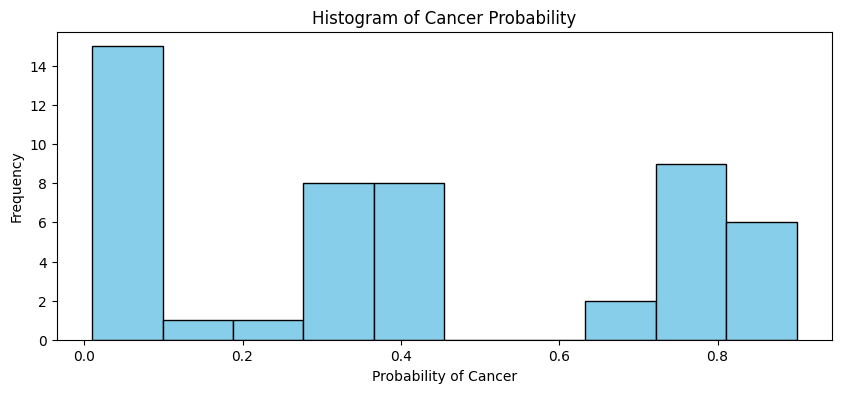

In [13]:
plt.figure(figsize=(10,4))
plt.hist(data['Probability of Cancer'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Cancer Probability')
plt.xlabel('Probability of Cancer')
plt.ylabel('Frequency')
plt.show()

**Box Plot**

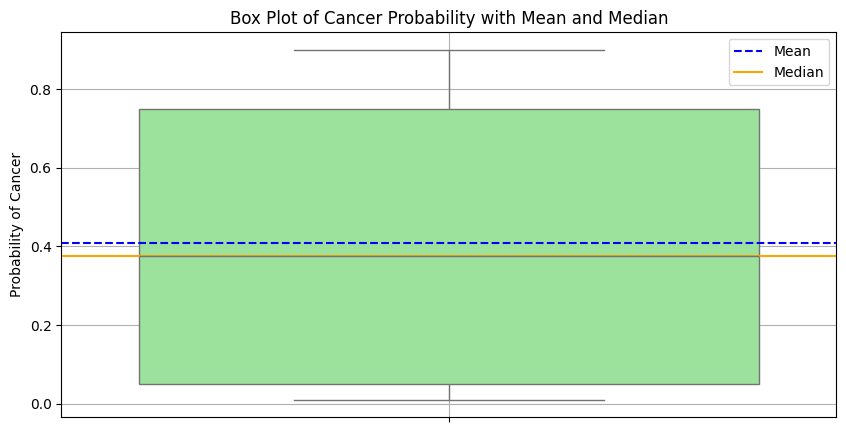

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['Probability of Cancer'], color='lightgreen')

plt.axhline(mean_cases, color='blue', linestyle='--', label='Mean')
plt.axhline(median_cases, color='orange', linestyle='-', label='Median')

plt.title('Box Plot of Cancer Probability with Mean and Median')
plt.ylabel('Probability of Cancer')
plt.legend()
plt.grid()
plt.show()

**Scatter Plot**

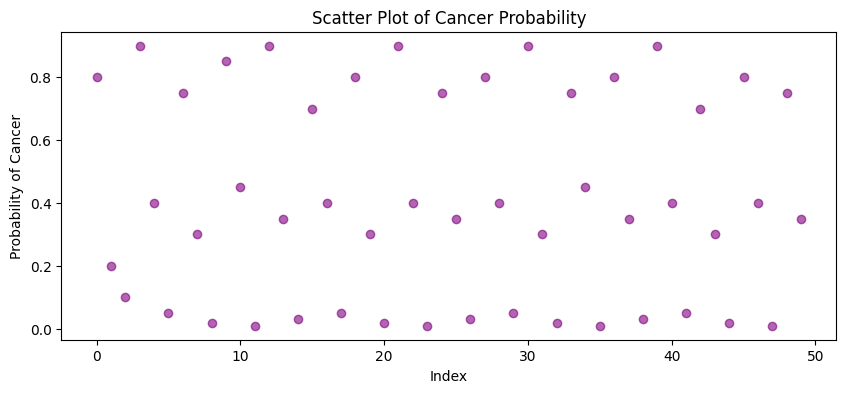

In [15]:
plt.figure(figsize=(10, 4))
plt.scatter(range(len(data['Probability of Cancer'])), data['Probability of Cancer'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Cancer Probability')
plt.xlabel('Index')
plt.ylabel('Probability of Cancer')
plt.show()

**Density Plot**

<ipython-input-16-a722579d0e38>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Probability of Cancer'], shade=True, color='orange')


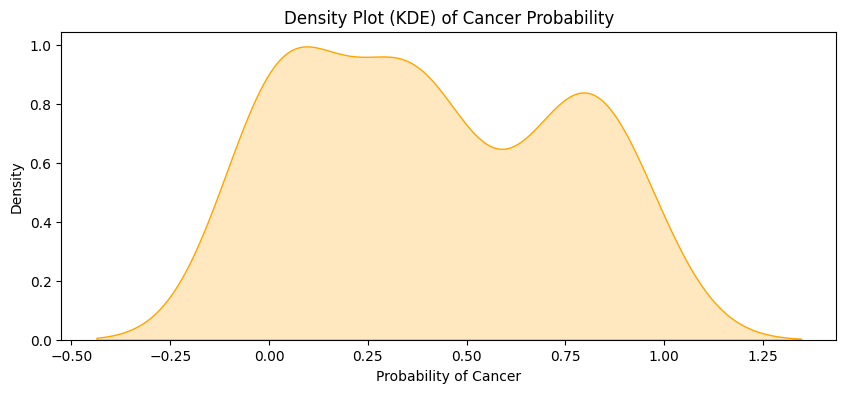

In [16]:
plt.figure(figsize=(10,4))
sns.kdeplot(data['Probability of Cancer'], shade=True, color='orange')
plt.title('Density Plot (KDE) of Cancer Probability')
plt.xlabel('Probability of Cancer')
plt.show()

**Bar Plot**

<ipython-input-17-967acd9d9fce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_table.index, y=freq_table.values, palette='Blues_d')


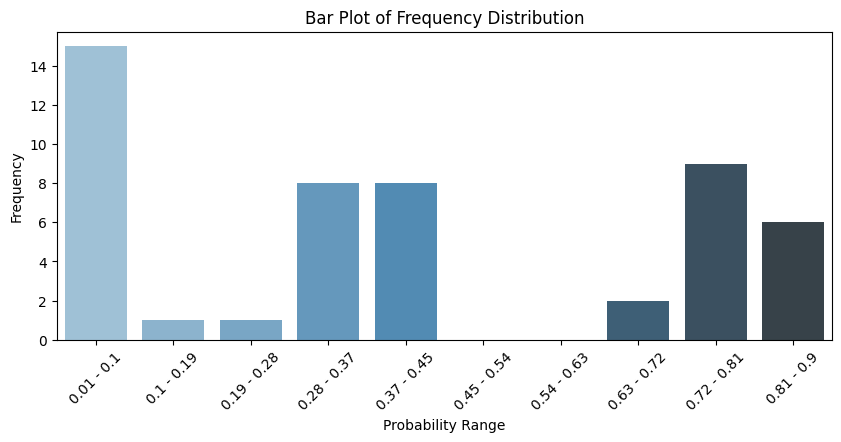

In [17]:
plt.figure(figsize=(10, 4))
sns.barplot(x=freq_table.index, y=freq_table.values, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Bar Plot of Frequency Distribution')
plt.xlabel('Probability Range')
plt.ylabel('Frequency')
plt.show()

**Line Plot**

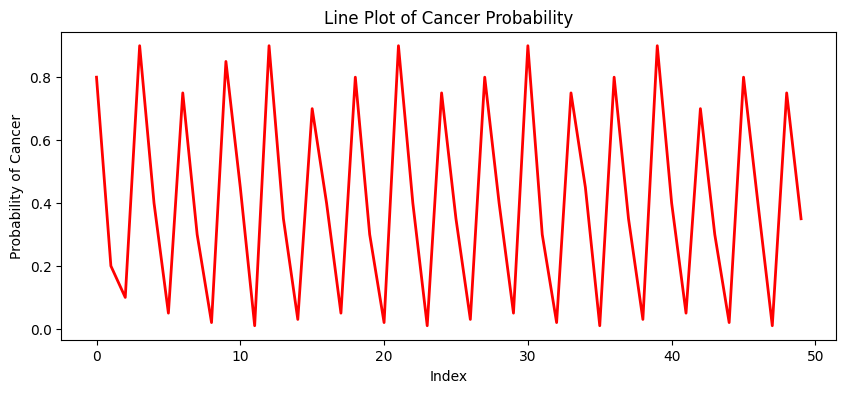

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(range(len(data['Probability of Cancer'])), data['Probability of Cancer'], color='red', lw=2)
plt.title('Line Plot of Cancer Probability')
plt.xlabel('Index')
plt.ylabel('Probability of Cancer')
plt.show()

**Probability Density Function**

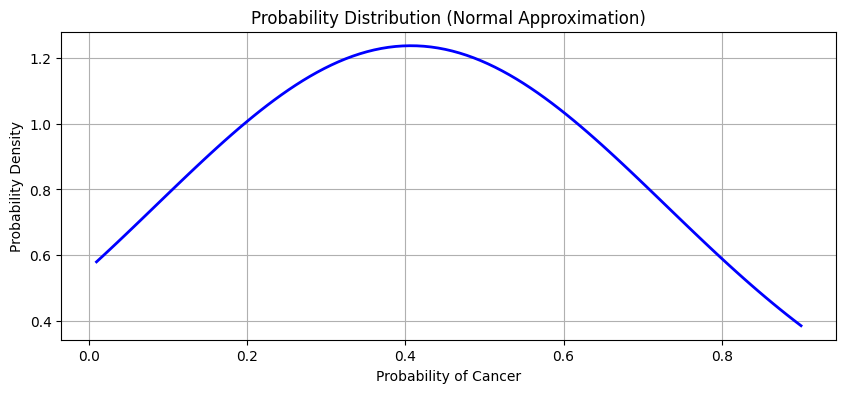

In [19]:
x = np.linspace(min(data['Probability of Cancer']), max(data['Probability of Cancer']), 100)

pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_cases) / std_dev) ** 2)

plt.figure(figsize=(10, 4))
plt.plot(x, pdf, color='blue', lw=2)
plt.title('Probability Distribution (Normal Approximation)')
plt.xlabel('Probability of Cancer')
plt.ylabel('Probability Density')
plt.grid()
plt.show()

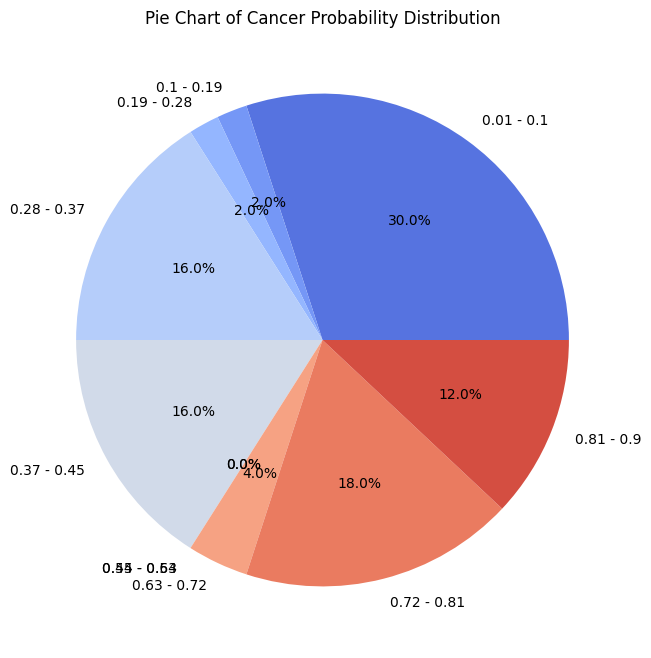

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(freq_table.values, labels=freq_table.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', num_bins))
plt.title('Pie Chart of Cancer Probability Distribution')
plt.show()